a) Find the Covariance matrix and Correlation matrix of this data matrix.

b) Perform PCA/SVD, choose appropriate number(justify by a scree plot) of dimensions/principal components/singular values and find the new data matrix in terms of these dimensions.

c) Plot the scatter plot of this data along the first two dimensions (or three if it is possible)

**You can download the dataset from https://www2.stetson.edu/~jrasp/data.htm**

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
plt.style.use('ggplot')


upload Poverty.xls file provided in classroom account

In [2]:
from google.colab import files
file=files.upload()


Saving Poverty.xls to Poverty.xls


**Read the Poverty Dataset**

In [3]:
data = pd.read_excel(io.BytesIO(file['Poverty.xls']))
data.head()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,GNP,Region,Country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,*,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary


In [4]:
target=data['Region']
target=pd.DataFrame(target)

target

,Region
0,1
1,1
2,1
3,1
4,1
...,...
92,6
93,6
94,6
95,6


In [5]:
new_data=data.drop(['GNP','Region','Country'],axis=1)
new_data.head()

,BirthRt,DeathRt,InfMort,LExpM,LExpF
0,24.7,5.7,30.8,69.6,75.5
1,12.5,11.9,14.4,68.3,74.7
2,13.4,11.7,11.3,71.8,77.7
3,12.0,12.4,7.6,69.8,75.9
4,11.6,13.4,14.8,65.4,73.8


Finding null values in data

In [6]:
data.isnull().sum()

BirthRt    0
DeathRt    0
InfMort    0
LExpM      0
LExpF      0
GNP        0
Region     0
Country    0
dtype: int64

**Finding covariance and correlation matrix**

In [7]:
cov_mat=new_data.cov()
cov_mat

,BirthRt,DeathRt,InfMort,LExpM,LExpF
BirthRt,183.512951,30.610056,534.794969,-112.876752,-133.345211
DeathRt,30.610056,21.599205,139.925900,-32.778745,-35.446906
InfMort,534.794969,139.925900,2115.317811,-414.329256,-483.566866
LExpM,-112.876752,-32.778745,-414.329256,92.466873,103.981642
LExpF,-133.345211,-35.446906,-483.566866,103.981642,121.118625


In [8]:
corr_mat=new_data.corr()
corr_mat

,BirthRt,DeathRt,InfMort,LExpM,LExpF
BirthRt,1.000000,0.486197,0.858353,-0.866519,-0.894414
DeathRt,0.486197,1.000000,0.654623,-0.733467,-0.693033
InfMort,0.858353,0.654623,1.000000,-0.936838,-0.955352
LExpM,-0.866519,-0.733467,-0.936838,1.000000,0.982558
LExpF,-0.894414,-0.693033,-0.955352,0.982558,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(new_data)


In [10]:

from sklearn.decomposition import PCA
pca1=PCA(n_components=5)
dim_5=pca1.fit_transform(df)

In [11]:
pca1.explained_variance_ratio_

array([0.85165929, 0.10989742, 0.02412219, 0.01165079, 0.00267032])

**Note :This values show that the first principal component PC1 explains 85.16% of the variation in the original data while the second principal component explains 10.98% of the variation in the original data. So the dataset can be explained by only two components(pc1 and pc2).**

# **Drow Scree plot**

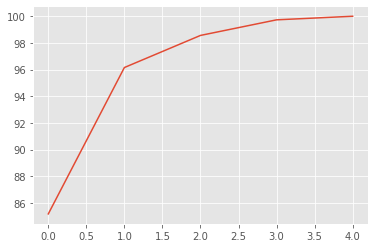

In [12]:
var1=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

<BarContainer object of 5 artists>

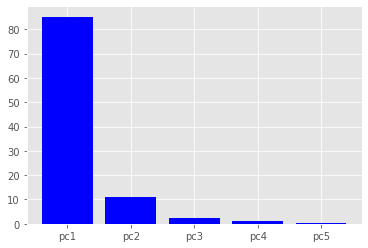

In [13]:
perc_var=(pca1.explained_variance_ratio_)*100
perc_var
x_axis=['pc1','pc2','pc3','pc4','pc5']
plt.bar(x= range(5), height=perc_var, tick_label=x_axis,color='b')

**With the help of PCA library of sklearn**

In [14]:
pca=PCA(n_components=3)
new_dim=pca.fit_transform(df)

In [15]:
new_df=pd.DataFrame(new_dim,columns=['pc1','pc2','pc3'])
new_df = pd.concat([new_df, target],axis = 1)

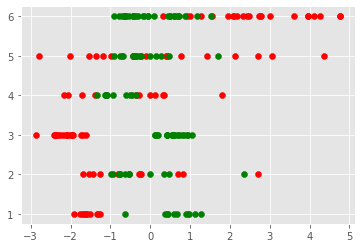

In [16]:
plt.scatter(new_df['pc1'], target,c='r')
plt.scatter(new_df['pc2'], target,c='g')

2D Plot

Text(0, 0.5, 'PC2')

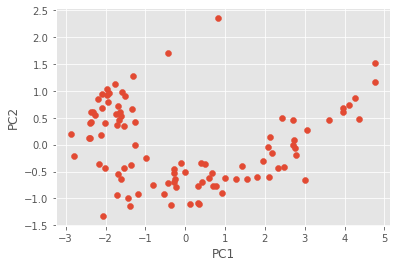

In [17]:
plt.figure()
plt.scatter(new_df['pc1'], new_df['pc2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

3D Plot

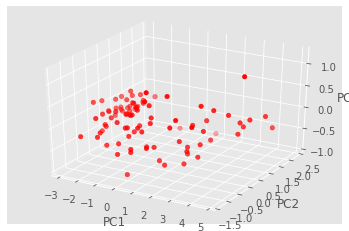

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(new_df['pc1'],new_df['pc2'],new_df['pc3'], c='r')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


**With the help of Eigen values and Eigen vector**

In [19]:
eig_val,eig_vec=np.linalg.eig(corr_mat)
eig_vec

array([[ 0.43608992,  0.4732857 , -0.72929146,  0.22269744,  0.06607609],
       [ 0.36801471, -0.86516808, -0.29031745,  0.17587254, -0.02887919],
       [ 0.46638433,  0.1318789 ,  0.57414551,  0.64413138,  0.14333637],
       [-0.47725374, -0.00517659, -0.15452835,  0.61885714, -0.60443271],
       [-0.47864943, -0.10032949, -0.17414841,  0.34869086,  0.78033052]])

In [20]:
print(eig_val)

[4.25829646 0.5494871  0.12061093 0.05825393 0.01335158]


In [21]:
pca1=new_data.dot(eig_vec.T[0])
pca2=new_data.dot(eig_vec.T[1])
pca3=new_data.dot(eig_vec.T[2])

Text(0, 0.5, 'PC2')

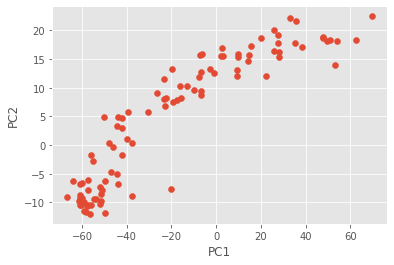

In [22]:
plt.figure()

plt.scatter(pca1, pca2)

plt.xlabel('PC1')
plt.ylabel('PC2')

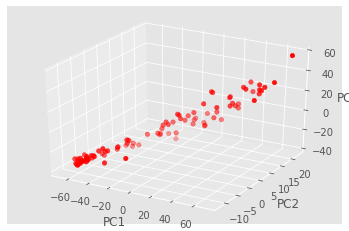

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca1, pca2, pca3, c='r')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

